<a href="https://colab.research.google.com/github/samarjahanahmedburney/Wild_Blueberry_Yield_Predictionbysamar-/blob/main/Wild_Blueberry_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [797]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR

**1. Load Dataset**

In [798]:
print("Data Loaded Successfully")
data = pd.read_csv("/content/sample_data/WildBlueberryPollinationSimulationData.csv")
display(data.head())

Data Loaded Successfully


,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [799]:
print("Dataset Shape:")
display(data.shape)

Dataset Shape:


(777, 18)

In [800]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass

In [801]:
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
             Row#   clonesize    honeybee     bumbles     andrena       osmia  \
count  777.000000  777.000000  777.000000  777.000000  777.000000  777.000000   
mean   388.000000   18.767696    0.417133    0.282389    0.468817    0.562062   
std    224.444871    6.999063    0.978904    0.066343    0.161052    0.169119   
min      0.000000   10.000000    0.000000    0.000000    0.000000    0.000000   
25%    194.000000   12.500000    0.250000    0.250000    0.380000    0.500000   
50%    388.000000   12.500000    0.250000    0.250000    0.500000    0.630000   
75%    582.000000   25.000000    0.500000    0.380000    0.630000    0.750000   
max    776.000000   40.000000   18.430000    0.585000    0.750000    0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count        777.000000        777.000000            777.000000   
mean          82.277091         49.700515             68.723037   
std            9.193745          5.595769       

In [802]:
print("Data info")
data.info()

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass    

In [803]:
print("Checking for Missing Values:")
data.isnull().sum()

Checking for Missing Values:


,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [804]:
data.duplicated().sum()

np.int64(0)

In [805]:
display(data.shape)

(777, 18)

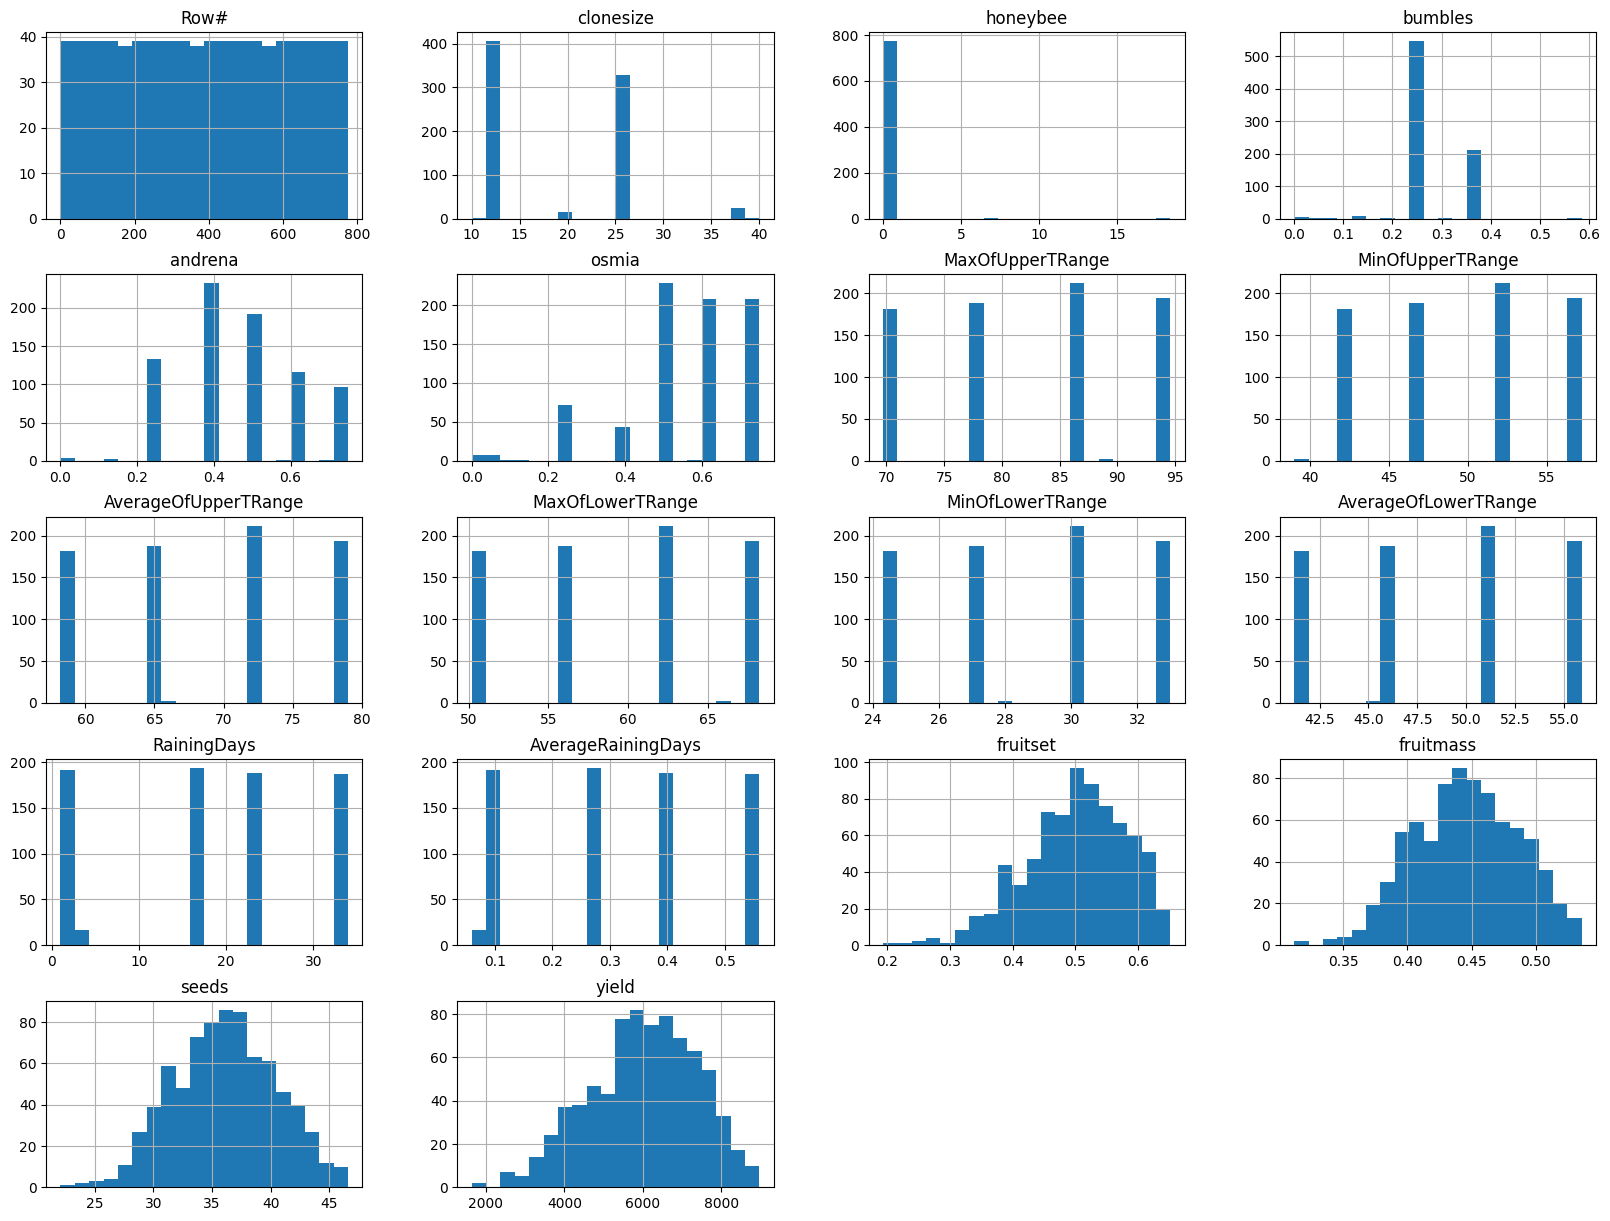

In [806]:
data.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

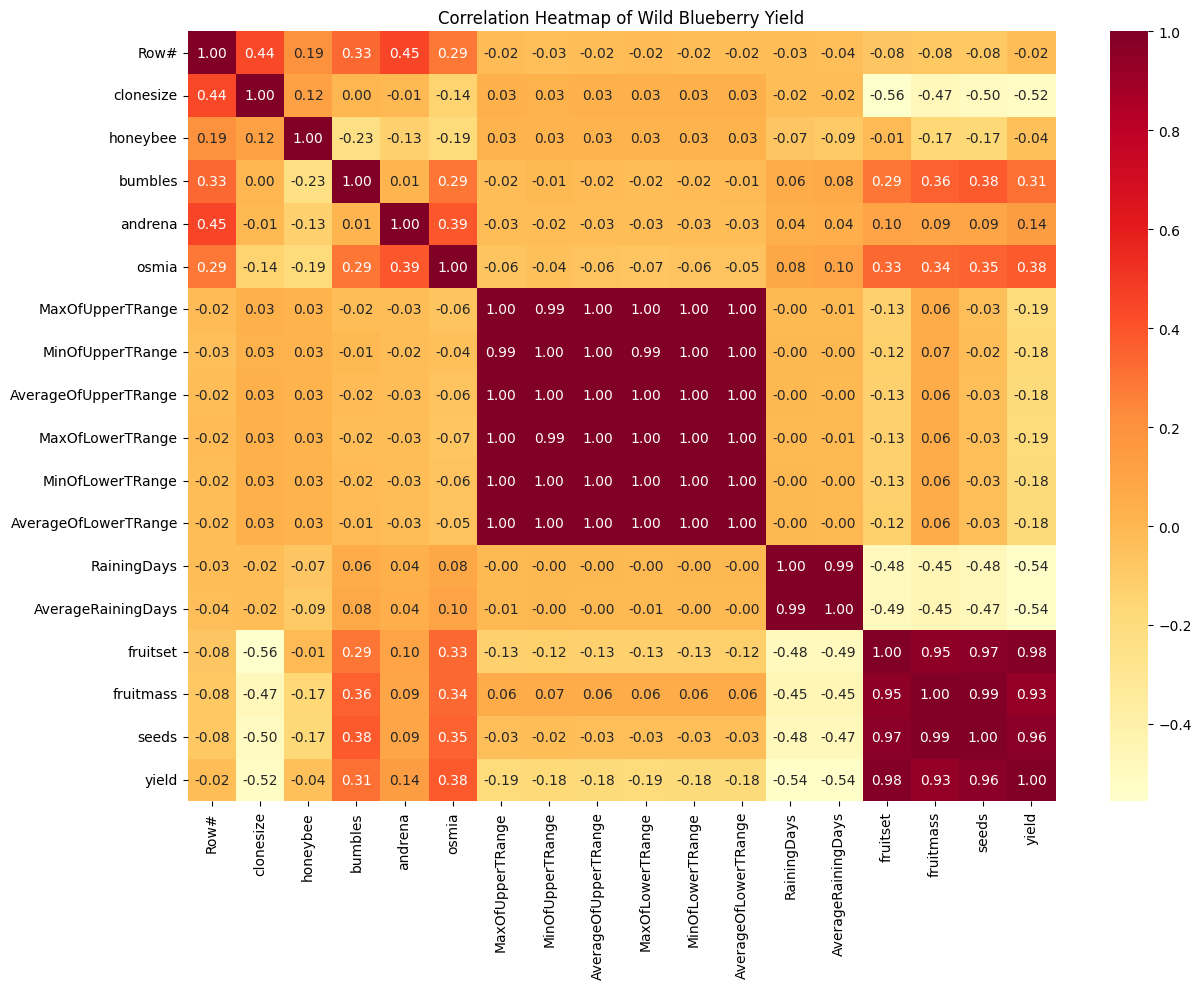

In [807]:
correlation = data.corr()
plt.figure(figsize=(14,10))

sns.heatmap(correlation,annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Correlation Heatmap of Wild Blueberry Yield")
plt.show()

In [808]:
print(correlation["yield"].sort_values(ascending=False))

yield                   1.000000
fruitset                0.984081
seeds                   0.961249
fruitmass               0.930365
osmia                   0.380892
bumbles                 0.309407
andrena                 0.140277
Row#                   -0.024942
honeybee               -0.044250
MinOfUpperTRange       -0.175883
AverageOfLowerTRange   -0.181293
AverageOfUpperTRange   -0.181774
MinOfLowerTRange       -0.183339
MaxOfUpperTRange       -0.187075
MaxOfLowerTRange       -0.187439
clonesize              -0.516737
RainingDays            -0.540069
AverageRainingDays     -0.541215
Name: yield, dtype: float64


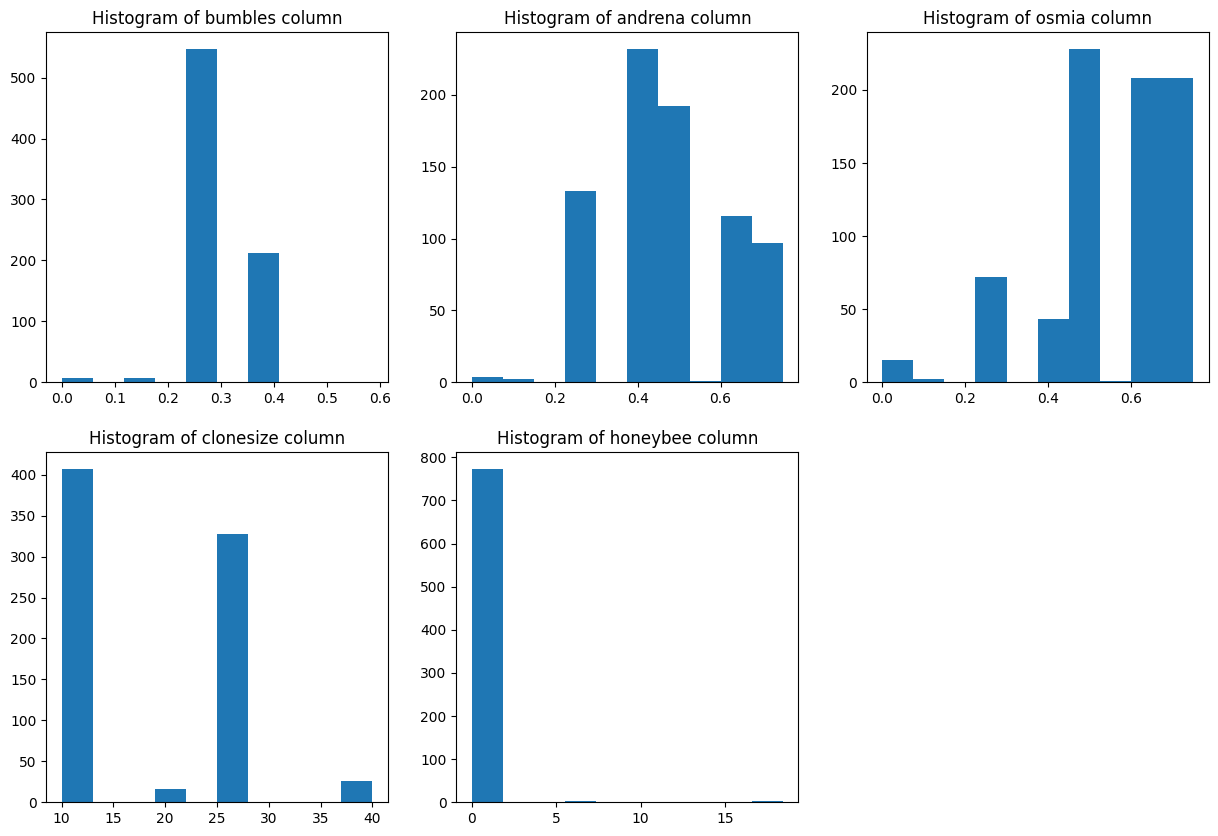

In [809]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(data['bumbles'])
plt.title("Histogram of bumbles column")
plt.subplot(2,3,2)
plt.hist(data['andrena'])
plt.title("Histogram of andrena column")
plt.subplot(2,3,3)
plt.hist(data['osmia'])
plt.title("Histogram of osmia column")
plt.subplot(2,3,4)
plt.hist(data['clonesize'])
plt.title("Histogram of clonesize column")
plt.subplot(2,3,5)
plt.hist(data['honeybee'])
plt.title("Histogram of honeybee column")
plt.show()

In [810]:
# Drop missing values
data_clean = data.dropna()

# Drop duplicate rows
data_clean = data_clean.drop_duplicates()

In [811]:
X = data.drop(columns=["yield"])
y = data['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Train Shape: (621, 17) Test Shape: (156, 17)


In [812]:
display(data.shape)

(777, 18)

In [813]:
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [814]:
X.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898
1,1.0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385
2,2.0,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306
3,3.0,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586
4,4.0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714


**Linear Regression**

In [815]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [816]:
y_pred_lr = lr.predict(X_test)

In [849]:
rmse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rrmse_lr = np.sqrt(rmse_lr) / np.mean(y_test) * 100

print("Linear Regression Results")
print(f"RMSE : {np.sqrt(rmse_lr):.3f}")
print(f"MAE  : {mae_lr:.3f}")
print(f"R²   : {r2_lr:.3f}")
print(f"RRMSE: {rrmse_lr:.3f}")

Linear Regression Results
RMSE : 133.488
MAE  : 99.416
R²   : 0.991
RRMSE: 2.274


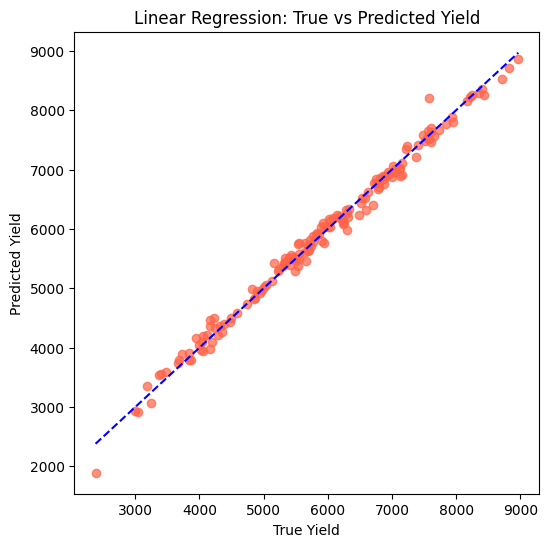

In [818]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color="tomato", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.title("Linear Regression: True vs Predicted Yield")
plt.xlabel("True Yield")
plt.ylabel("Predicted Yield")
plt.show()


**Random Forest**

In [819]:
rf = RandomForestRegressor(
    n_estimators=300,     # number of trees
    max_depth=None,       # let trees expand fully
    random_state=42,
    n_jobs=-1             # use all CPU cores
)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [820]:
y_pred_rf = rf.predict(X_test)

In [848]:
rmse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)
rrmse_rf = np.sqrt(rmse_rf) / np.mean(y_test) * 100

print("Random Forest Results")
print(f"RMSE : {np.sqrt(rmse_rf):.3f}")
print(f"MAE  : {mae_rf:.3f}")
print(f"R²   : {r2_rf:.3f}")
print(f"RRMSE: {rrmse_rf:.3f}")

Random Forest Results
RMSE : 150.307
MAE  : 113.657
R²   : 0.988
RRMSE: 2.561


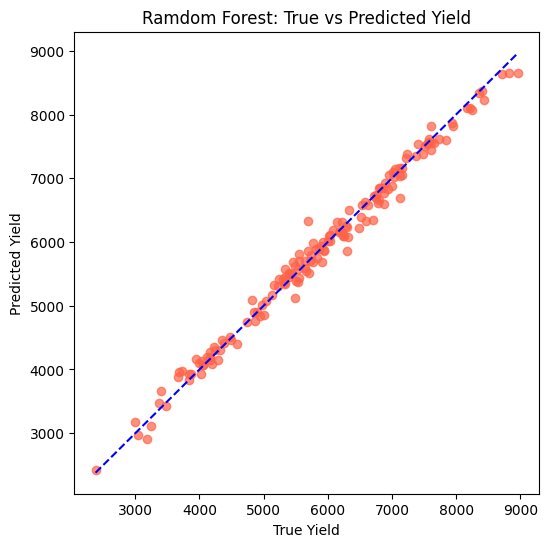

In [822]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, color="tomato", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.title("Ramdom Forest: True vs Predicted Yield")
plt.xlabel("True Yield")
plt.ylabel("Predicted Yield")
plt.show()

**Decision Tree**

In [823]:
param_grid = {
    "max_depth": [5, 7, 9, 11, 13, 15, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "criterion": ["squared_error", "friedman_mse", "absolute_error"]
}

grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 7, 9, 11, 13, 15, None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2', verbose=1)

In [824]:
dt = grid_dt.best_estimator_
y_pred_dt = dt.predict(X_test)

In [847]:
rmse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rrmse_dt = np.sqrt(rmse_dt) / np.mean(y_test) * 100

print("Decision Tree Results")
print(f"RMSE : {np.sqrt(rmse_dt):.3f}")
print(f"MAE  : {mae_dt:.3f}")
print(f"R²   : {r2_dt:.3f}")
print(f"RRMSE: {rrmse_dt:.3f}")

Decision Tree Results
RMSE : 210.319
MAE  : 145.276
R²   : 0.977
RRMSE: 3.584


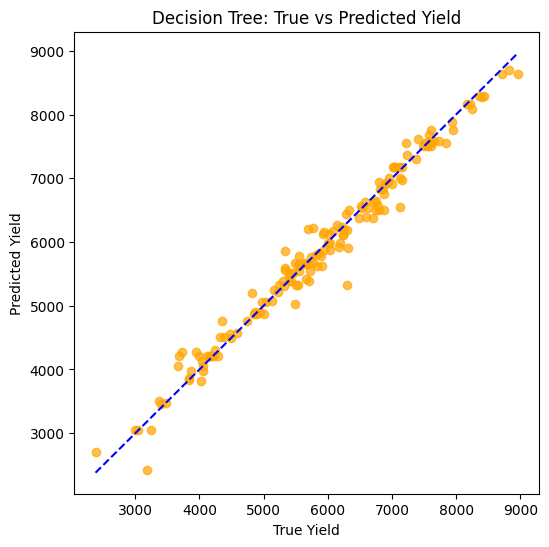

In [826]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_dt, color="orange", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.title("Decision Tree: True vs Predicted Yield")
plt.xlabel("True Yield")
plt.ylabel("Predicted Yield")
plt.show()


/tmp/ipython-input-350994990.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=importance.index, palette="YlOrRd")


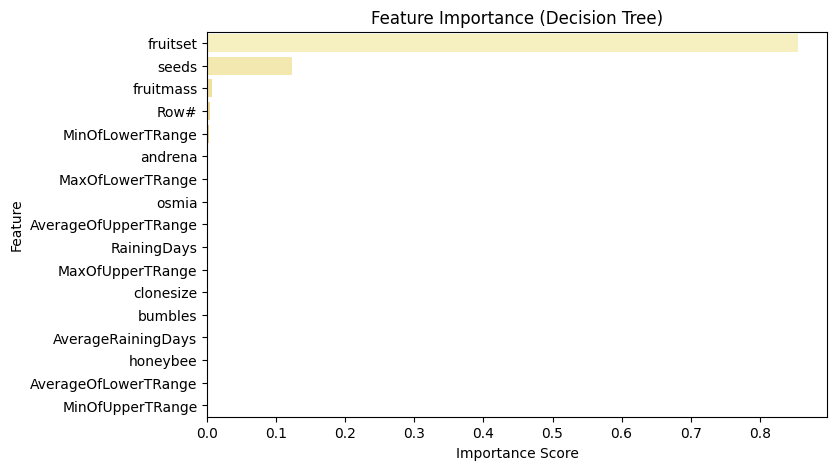

In [827]:
importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=importance.index, palette="YlOrRd")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

XGBRegressor

In [828]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}
def train_eval(X_train, X_test, y_train, y_test):
    # Convert data into XGBoost DMatrix format (faster)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

In [829]:
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtrain, "train"), (dtest, "test")],
    early_stopping_rounds=30,
    verbose_eval=False
)

In [830]:
y_pred = xgb.DMatrix(X_test)
y_pred = xgb.train(params, dtrain, num_boost_round=500).predict(dtest)

In [846]:
mse = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse)
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
rrmse_xgb = rmse_xgb / np.mean(y_test) * 100

print("XGBoost Results")
print(f"RMSE : {rmse_xgb:.3f}")
print(f"MAE  : {mae_xgb:.3f}")
print(f"R²   : {r2_xgb:.3f}")
print(f"RRMSE: {rrmse_xgb:.3f}")


XGBoost Results
RMSE : 131.243
MAE  : 104.506
R²   : 0.991
RRMSE: 2.236


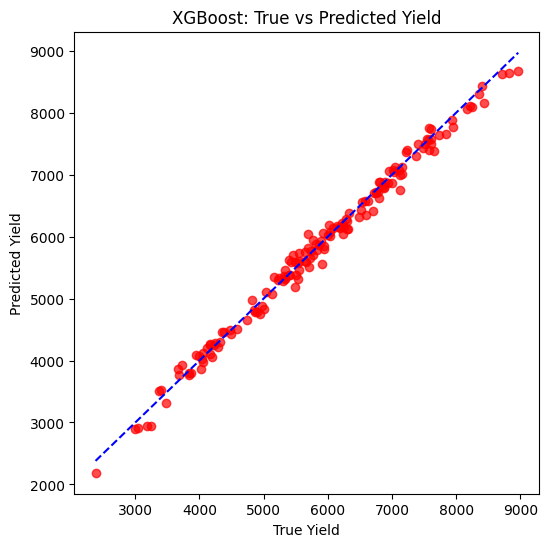

In [832]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="red", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.title("XGBoost: True vs Predicted Yield")
plt.xlabel("True Yield")
plt.ylabel("Predicted Yield")
plt.show()

**Support Vector Regressor (SVR)**

In [833]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

param_grid = {
    'C': [10, 50, 100, 200],
    'gamma': [0.01, 0.05, 0.1, 0.5],
    'epsilon': [0.05, 0.1, 0.2]
}

grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', verbose=1)
grid_svr.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_svr.best_params_)
best_svr = grid_svr.best_estimator_

y_pred_best = best_svr.predict(X_test_scaled)
print("Tuned R²:", r2_score(y_test, y_pred_best))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'C': 200, 'epsilon': 0.2, 'gamma': 0.01}
Tuned R²: 0.9877081903898676


In [834]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'C': [10, 50, 100, 200],
    'gamma': [0.01, 0.05, 0.1, 0.5],
    'epsilon': [0.05, 0.1, 0.2]
}

print("🔍 Searching best parameters... (this may take 1–2 minutes)")
grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', verbose=1)
grid_svr.fit(X_train_scaled, y_train)

🔍 Searching best parameters... (this may take 1–2 minutes)
Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [10, 50, 100, 200], 'epsilon': [0.05, 0.1, 0.2],
                         'gamma': [0.01, 0.05, 0.1, 0.5]},
             scoring='r2', verbose=1)

In [835]:
print("Parameters Found:", grid_svr.best_params_)


Parameters Found: {'C': 200, 'epsilon': 0.2, 'gamma': 0.01}


In [836]:
y_pred_svr = best_svr.predict(X_test_scaled)

In [845]:
rmse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr  = mean_absolute_error(y_test, y_pred_svr)
r2_svr   = r2_score(y_test, y_pred_svr)
rrmse_svr = np.sqrt(rmse_svr) / np.mean(y_test) * 100

print("SVR Results")
print(f"RMSE : {np.sqrt(rmse_svr):.3f}")
print(f"MAE  : {mae_svr:.3f}")
print(f"R²   : {r2_svr:.3f}")
print(f"RRMSE: {rrmse_svr:.2f}%")

SVR Results
RMSE : 154.566
MAE  : 117.819
R²   : 0.988
RRMSE: 2.63%


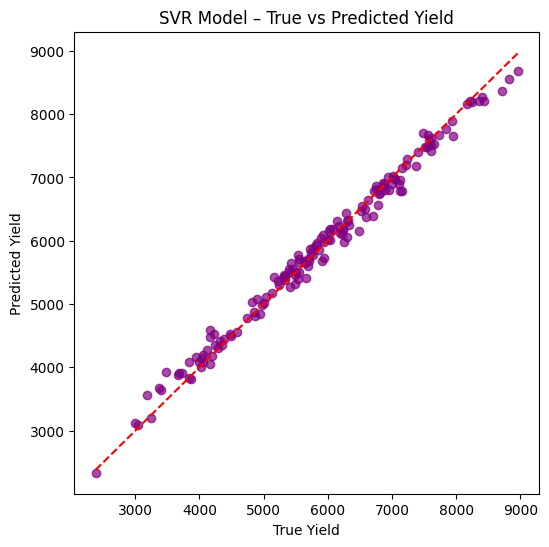

In [838]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_svr, color="purple", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("SVR Model – True vs Predicted Yield")
plt.xlabel("True Yield")
plt.ylabel("Predicted Yield")
plt.show()

In [839]:
results = [
    ["Linear Regression", rmse_lr, mae_lr, r2_lr,rrmse_lr],
    ["Decision Tree", rmse_dt, mae_dt, r2_dt,rrmse_dt],
    ["Random Forest", rmse_rf, mae_rf, r2_rf,rrmse_rf],
    ["XGBoost", rmse_xgb, mae_xgb, r2_xgb,rrmse_xgb],
    ["SVR", rmse_svr, mae_svr, r2_svr,rrmse_svr]
]

results_data = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2","RRMSE"]).sort_values("RMSE")

print("Model result comparison :")
print(results_data)

Model result comparison :
               Model          RMSE         MAE        R2     RRMSE
3            XGBoost    131.242603  104.505933  0.991138  2.236216
0  Linear Regression  17819.137165   99.416314  0.990832  2.274481
2      Random Forest  22592.092614  113.656755  0.988376  2.561045
4                SVR  23890.701819  117.819157  0.987708  2.633622
1      Decision Tree  44234.111199  145.275914  0.977241  3.583584


/tmp/ipython-input-3317980881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=results_data, palette="viridis")


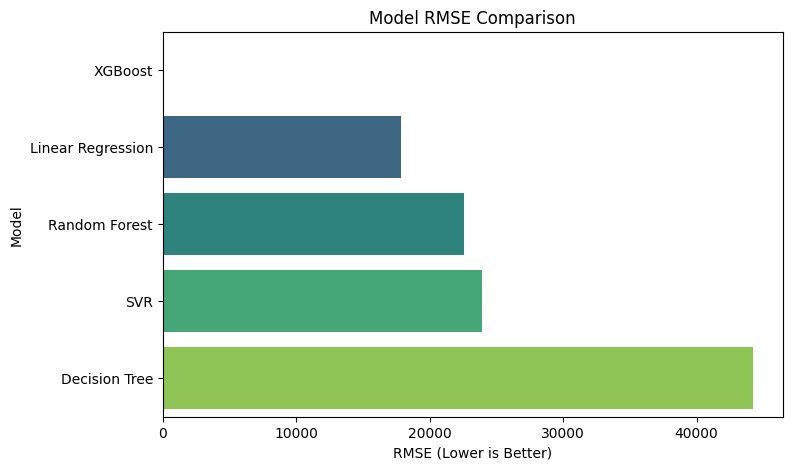

In [840]:
plt.figure(figsize=(8,5))
sns.barplot(x="RMSE", y="Model", data=results_data, palette="viridis")
plt.title("Model RMSE Comparison")
plt.xlabel("RMSE (Lower is Better)")
plt.ylabel("Model")
plt.show()

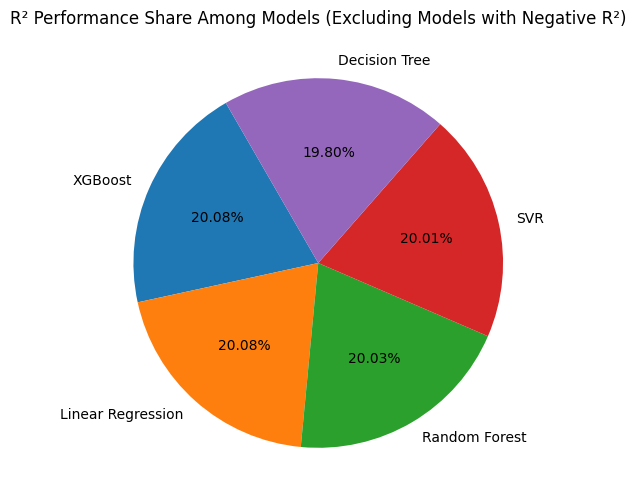

In [841]:
plt.figure(figsize=(6,6))
# Filter out models with negative R2 scores
results_for_pie = results_data[results_data['R2'] >= 0].copy()
plt.pie(results_for_pie["R2"], labels=results_for_pie["Model"], autopct='%1.2f%%', startangle=120)
plt.title("R² Performance Share Among Models (Excluding Models with Negative R²)")
plt.show()

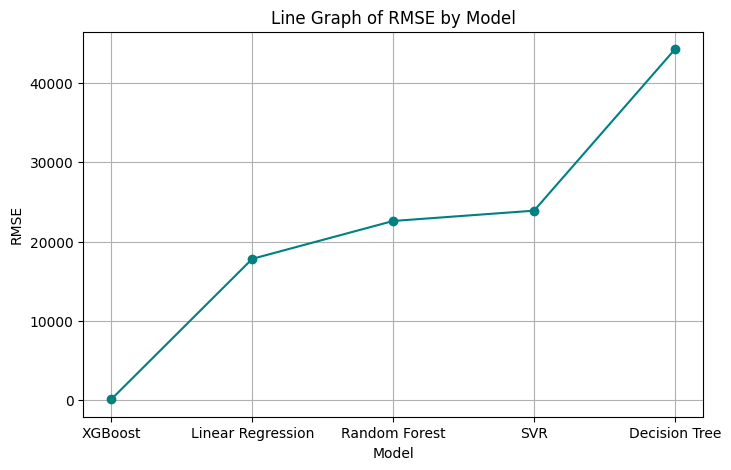

In [842]:
plt.figure(figsize=(8,5))
plt.plot(results_data["Model"], results_data["RMSE"], marker='o', linestyle='-', color='teal')
plt.title("Line Graph of RMSE by Model")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

In [850]:
best_model_name = results_data.iloc[0, 0]
print(f"Best model based on RMSE: {best_model_name}")

if best_model_name == "Linear Regression":
    best_model = lr
elif best_model_name == "Decision Tree":
    best_model = dt
elif best_model_name == "Random Forest":
    best_model = rf
elif best_model_name == "XGBoost":
    best_model = xgb
elif best_model_name == "SVR":
    best_model = grid_svr
else:
    raise ValueError("Unknown model name in results_data.")


Best model based on RMSE: XGBoost


In [844]:
print("Model Performance Summary:")
display(results_data)


Model Performance Summary:


,Model,RMSE,MAE,R2,RRMSE
3,XGBoost,131.242603,104.505933,0.991138,2.236216
0,Linear Regression,17819.137165,99.416314,0.990832,2.274481
2,Random Forest,22592.092614,113.656755,0.988376,2.561045
4,SVR,23890.701819,117.819157,0.987708,2.633622
1,Decision Tree,44234.111199,145.275914,0.977241,3.583584
